# Broadcasting 自动扩展

In [1]:
import torch
import numpy as np

从最后一个维度扩展，扩张的维度要么是[1],要么是与需要扩张的维度相同

例A=[4,32,14,14]

B=[14,14]  => [1,1,14,14] => [4,32,14,14]

# 拼接与拆分

# cat

In [2]:
a = torch.rand(4,32,8)
b = torch.rand(5,32,8)
torch.cat([a,b],dim=0).shape

torch.Size([9, 32, 8])

In [3]:
a1 = torch.rand(4,3,32,32)
a2 = torch.rand(5,3,32,32)
torch.cat([a1,a2],dim=0).shape

torch.Size([9, 3, 32, 32])

In [4]:
a2 = torch.rand(4,1,32,32)
torch.cat([a1,a2],dim=0).shape

RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 3 and 1 in dimension 1 at C:\w\1\s\tmp_conda_3.7_183424\conda\conda-bld\pytorch_1570818936694\work\aten\src\TH/generic/THTensor.cpp:689

说明：非配对维度要求保持相同，否则无法拼接

In [5]:
torch.cat([a1,a2],dim=1).shape

torch.Size([4, 4, 32, 32])

考察拼接方法:

In [6]:
b1 = torch.rand(3,4)
b1

tensor([[0.3077, 0.4814, 0.4689, 0.1278],
        [0.0873, 0.9864, 0.3447, 0.2855],
        [0.3171, 0.3473, 0.7181, 0.7329]])

In [7]:
b2 = torch.rand(3,3)
b2

tensor([[0.1506, 0.1945, 0.8040],
        [0.2064, 0.3164, 0.2303],
        [0.3953, 0.3728, 0.2144]])

In [8]:
torch.cat([b1,b2],dim=1)

tensor([[0.3077, 0.4814, 0.4689, 0.1278, 0.1506, 0.1945, 0.8040],
        [0.0873, 0.9864, 0.3447, 0.2855, 0.2064, 0.3164, 0.2303],
        [0.3171, 0.3473, 0.7181, 0.7329, 0.3953, 0.3728, 0.2144]])

In [9]:
c1 = torch.rand(2,2,2)
c1

tensor([[[0.0280, 0.7180],
         [0.9219, 0.7295]],

        [[0.4211, 0.4759],
         [0.2740, 0.5811]]])

In [11]:
c2 = torch.rand(2,3,2)
c2

tensor([[[0.6046, 0.5155],
         [0.7683, 0.5252],
         [0.8155, 0.3747]],

        [[0.8370, 0.0339],
         [0.2195, 0.4642],
         [0.2225, 0.6090]]])

In [12]:
torch.cat([c1,c2],dim=1)

tensor([[[0.0280, 0.7180],
         [0.9219, 0.7295],
         [0.6046, 0.5155],
         [0.7683, 0.5252],
         [0.8155, 0.3747]],

        [[0.4211, 0.4759],
         [0.2740, 0.5811],
         [0.8370, 0.0339],
         [0.2195, 0.4642],
         [0.2225, 0.6090]]])

In [13]:
c2=torch.rand(3,2,2)
c2

tensor([[[0.5647, 0.5184],
         [0.3277, 0.3315]],

        [[0.7374, 0.8932],
         [0.2345, 0.7155]],

        [[0.2650, 0.0523],
         [0.9778, 0.8249]]])

In [15]:
torch.cat([c1,c2],dim=0)

tensor([[[0.0280, 0.7180],
         [0.9219, 0.7295]],

        [[0.4211, 0.4759],
         [0.2740, 0.5811]],

        [[0.5647, 0.5184],
         [0.3277, 0.3315]],

        [[0.7374, 0.8932],
         [0.2345, 0.7155]],

        [[0.2650, 0.0523],
         [0.9778, 0.8249]]])

这下明白了吗？？

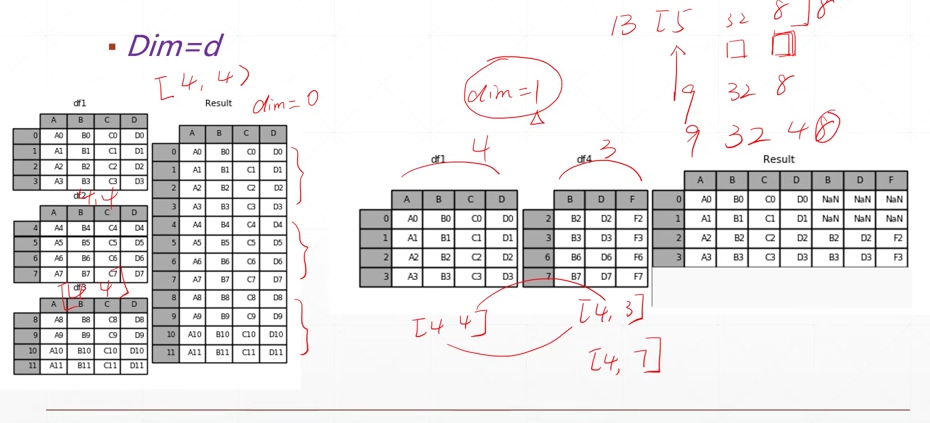

# stack

In [20]:
a1=torch.rand(4,3,16,32)
a2=torch.rand(4,3,16,32)

In [21]:
torch.stack([a1,a2],dim=2).shape

torch.Size([4, 3, 2, 16, 32])

stack拼接插入了一个新的维度

看一个简单的例子：

In [23]:
b1 = torch.rand(2,4)
b1

tensor([[0.2588, 0.3887, 0.2129, 0.9203],
        [0.6243, 0.3635, 0.5170, 0.2528]])

In [24]:
b2 = torch.rand(2,4)
b2

tensor([[0.1283, 0.0843, 0.2146, 0.4134],
        [0.1645, 0.7366, 0.1522, 0.8006]])

In [25]:
torch.stack([b1,b2],dim=0)

tensor([[[0.2588, 0.3887, 0.2129, 0.9203],
         [0.6243, 0.3635, 0.5170, 0.2528]],

        [[0.1283, 0.0843, 0.2146, 0.4134],
         [0.1645, 0.7366, 0.1522, 0.8006]]])

stack作拼接所有维度必须一致

# split

拆分方法有两种：

（1）按照长度拆分

（2）具体给定拆分长度

In [27]:
b = torch.rand(5,4)
b

tensor([[0.0268, 0.4932, 0.4725, 0.0113],
        [0.0147, 0.5404, 0.1151, 0.1813],
        [0.7604, 0.6268, 0.9517, 0.7426],
        [0.9325, 0.1844, 0.2354, 0.8048],
        [0.2437, 0.9441, 0.6519, 0.8817]])

In [28]:
b.split(1,dim=0)  # 拆分为5个tensor

(tensor([[0.0268, 0.4932, 0.4725, 0.0113]]),
 tensor([[0.0147, 0.5404, 0.1151, 0.1813]]),
 tensor([[0.7604, 0.6268, 0.9517, 0.7426]]),
 tensor([[0.9325, 0.1844, 0.2354, 0.8048]]),
 tensor([[0.2437, 0.9441, 0.6519, 0.8817]]))

In [29]:
b.split(2,dim=0)

(tensor([[0.0268, 0.4932, 0.4725, 0.0113],
         [0.0147, 0.5404, 0.1151, 0.1813]]),
 tensor([[0.7604, 0.6268, 0.9517, 0.7426],
         [0.9325, 0.1844, 0.2354, 0.8048]]),
 tensor([[0.2437, 0.9441, 0.6519, 0.8817]]))

In [30]:
b.split([3,1,1],dim=0)  # 自定义拆分长度

(tensor([[0.0268, 0.4932, 0.4725, 0.0113],
         [0.0147, 0.5404, 0.1151, 0.1813],
         [0.7604, 0.6268, 0.9517, 0.7426]]),
 tensor([[0.9325, 0.1844, 0.2354, 0.8048]]),
 tensor([[0.2437, 0.9441, 0.6519, 0.8817]]))

# chunk

按数量来拆分

In [31]:
c = torch.rand(6,4)
c

tensor([[0.6225, 0.3554, 0.8745, 0.4206],
        [0.9355, 0.7876, 0.9350, 0.1703],
        [0.2643, 0.3455, 0.2602, 0.9913],
        [0.6928, 0.7174, 0.9843, 0.4867],
        [0.3752, 0.1736, 0.4700, 0.9473],
        [0.1798, 0.6191, 0.0250, 0.6179]])

In [32]:
c.chunk(3,dim=0) # 意指分成3块

(tensor([[0.6225, 0.3554, 0.8745, 0.4206],
         [0.9355, 0.7876, 0.9350, 0.1703]]),
 tensor([[0.2643, 0.3455, 0.2602, 0.9913],
         [0.6928, 0.7174, 0.9843, 0.4867]]),
 tensor([[0.3752, 0.1736, 0.4700, 0.9473],
         [0.1798, 0.6191, 0.0250, 0.6179]]))